# Regresión en Series de Tiempo

In [1]:
print("Modificación para GitHub")

Modificación para GitHub


In [2]:
!pip install astsadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 473 kB 13.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: Use

### Ejemplo 2.1. Estimación de tendencia lineal 

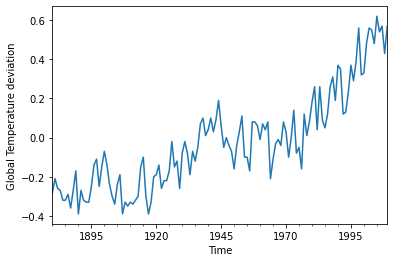

In [4]:
# Example 2.1
# Desviaciones de temperatura global 
ax = gtemp.plot(xlabel="Time", ylabel="Global Temperature deviation", legend=False)


                            OLS Regression Results                            
Dep. Variable:                  gtemp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     386.3
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.80e-40
Time:                        05:15:53   Log-Likelihood:                 86.718
No. Observations:                 130   AIC:                            -169.4
Df Residuals:                     128   BIC:                            -163.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1250      0.013      9.417      0.0

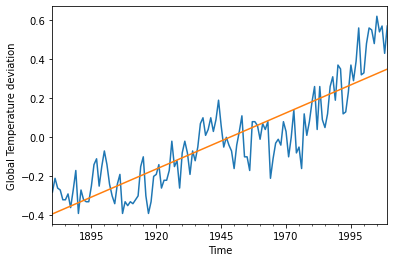

In [8]:
# Example 2.1
time = pd.Series([idx.ordinal for idx in gtemp.index], index=gtemp.index)
data_reg = pd.concat([time, gtemp], axis=1)
data_reg.columns = ["time", "gtemp"]

fit = ols(formula="gtemp ~ time", data=data_reg).fit() # Fórmula de la regresión lineal
print(fit.summary())

ax = gtemp.plot(xlabel="Time", ylabel="Global Temperature deviation", legend=False)
ax.plot(data_reg.index, fit.params.Intercept + fit.params.time * time) # Serie real vs ajuste lineal (ecuación reconstruida)
plt.show()

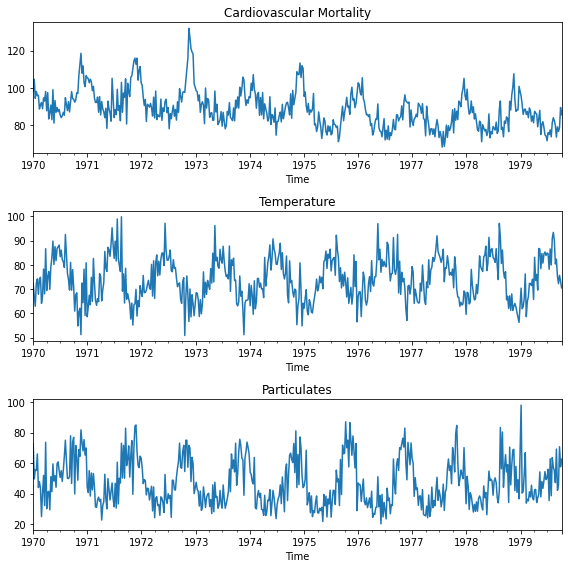

In [12]:
# Example 2.2
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))

cmort.plot(ax=axes[0], xlabel="Time", title="Cardiovascular Mortality", legend=False)
tempr.plot(ax=axes[1], xlabel="Time", title="Temperature", legend=False)
part.plot(ax=axes[2], xlabel="Time", title="Particulates", legend=False)

fig.tight_layout()
plt.show()

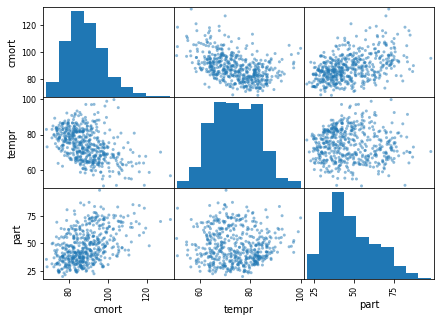

In [13]:
pairs = pd.concat([cmort, tempr, part], axis=1)
pairs.columns = ["cmort", "tempr", "part"]

pd.plotting.scatter_matrix(pairs, figsize=(7, 5)) #Pairplot
plt.show()

In [14]:
# Regression
temp = tempr - tempr.mean() # center temperature
temp2 = temp.pow(2) # square it
trend = pd.Series([idx.ordinal for idx in cmort.index], index=cmort.index) # time

X = pd.concat([cmort, temp, temp2, trend, part], axis=1)
X.columns = ["cmort", "temp", "temp2", "trend", "part"]

fit = ols(formula="cmort ~ trend + temp + temp2 + part", data=X).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cmort   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.20e-97
Time:                        05:20:18   Log-Likelihood:                -1660.1
No. Observations:                 508   AIC:                             3330.
Df Residuals:                     503   BIC:                             3351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.5931      1.102     74.032      0.0

In [15]:
print(sm.stats.anova_lm(fit)) # ANOVA table

             df        sum_sq       mean_sq           F        PR(>F)
trend       1.0  10673.289494  10673.289494  261.791867  1.035893e-47
temp        1.0   8605.746543   8605.746543  211.079673  3.472363e-40
temp2       1.0   3427.085491   3427.085491   84.058725  1.227231e-18
part        1.0   7473.199730   7473.199730  183.300838  7.874638e-36
Residual  503.0  20507.377403     40.770134         NaN           NaN
